In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install wikipedia
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import PIL
import os
import tensorflow as tf
from keras.models import load_model, model_from_json

import pandas as pd
import wikipedia

from pytrends.request import TrendReq

import matplotlib.pyplot as plt
from matplotlib.artist import kwdoc
import seaborn as sns

from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
json_file = open('/content/drive/MyDrive/model_tourist_TF.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/model_tourist_tf_weights.h5")
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 35, 35, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 31, 31, 128)       7

In [ ]:
# predict image class
def predictPlace(img):
  classes = ['Pantheon', 'Colosseum', 'Temple_nara', 'palace_of_westminister', 'trevi_fountain', 'buckingham_palace', 'grand_palace_brussels', 'Notre_dam', 'branderburg_gate', 'Taj Mahal']
  pred = loaded_model.predict(img)
  print(pred)
  result = np.argmax(pred)
  print('You are looking at', classes[result])
  #print('You are looking at', result)
  return result

Text(0, 0.5, '1740')

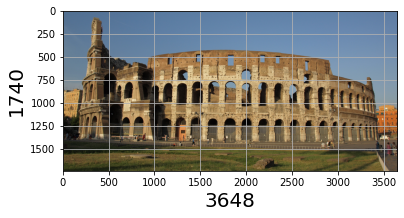

In [ ]:
#test_image = '/content/drive/MyDrive/brand.jpg'
test_image = '/content/drive/MyDrive/coloseum.jpg'
#test_image = '/content/drive/MyDrive/trevi.jpg'

im = imread(test_image)
plt.imshow(im)
plt.grid(b=None)
plt.xlabel(im.shape[1], fontsize = 20)#width of image
plt.ylabel(im.shape[0], fontsize = 20)#height of image


(75, 75, 3)


Text(0, 0.5, '75')

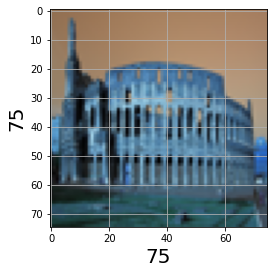

In [ ]:
# preprocess the image
image = cv2.imread(test_image)
image_fromarray = Image.fromarray(image, 'RGB')
resized_image = image_fromarray.resize((75, 75))

im = np.array(resized_image)


print(im.shape)

plt.imshow(im)
plt.grid(b=None)
plt.xlabel(im.shape[1], fontsize = 20)#width of image
plt.ylabel(im.shape[0], fontsize = 20)#height of image

In [ ]:
# expand dims to fit the model and predict
im = np.expand_dims(im, axis=0)
pred = predictPlace(im)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
You are looking at Colosseum


In [ ]:
classes = ['pantheon', 'colosseum', 'Tōdai-ji', 'Palaceofwestminster', 'trevi_fountain', 'buckinghampalace', 'The Grand Place', 'Notre-Dame de Paris', 'brandenburggate', 'TajMahal']
key1 = ['Pantheon', 'Colosseum', 'Tōdai-ji', 'Palace of westminster', 'Trevi fountain', 'Buckingham Palace', 'The Grand Place', 'Notre-Dame de Paris', 'Brandenburg Gate', 'Taj Mahal']
def suggestions(classes, pred, key1):
  name = classes[pred]
  kw = key1[pred]

  #wikipedia
  wikipedia.set_lang("en")
  summ = wikipedia.summary(name)

  #trends
  from pytrends.request import TrendReq
  pytrends = TrendReq(tz=60)
  pytrends.build_payload(kw_list=[kw],timeframe = 'now 7-d')
  df = pytrends.interest_over_time()
  dfi = df.copy()
  #plt.figure(figsize=(6,6))
  plt.figure(figsize=(12,6))
  title = 'interest over time: ' + kw
  img = sns.lineplot(data=dfi, x="date", y=kw).set_title(title)
  

  df1 = pytrends.interest_by_region()

  dft = df1.copy()
  dft = dft.reset_index()
  dft1 = dft[dft[kw]>=20]
  #dft.reset_index().plot(x='geoName', y='Taj Mahal', figsize=(120, 10), kind ='bar')
  plt.figure(figsize=(12,6))
  title1 = 'interest by region: ' + kw
  img1 = sns.barplot(x='geoName', y=kw, data=dft1).set_title(title1)

  df2  = pytrends.related_queries()

  top_topics = pd.DataFrame(df2[kw]['top'])
  
  rising_topics = pd.DataFrame(df2[kw]['rising'])


  return summ, img, img1, top_topics.head(), rising_topics.head()

('The Colosseum ( KOL-ə-SEE-əm; Italian: Colosseo [kolosˈsɛːo]) is an oval amphitheatre in the centre of the city of Rome, Italy, just east of the Roman Forum. It is the largest ancient amphitheatre ever built, and is still the largest standing amphitheatre in the world today, despite its age. Construction began under the emperor Vespasian (r. 69–79 AD) in 72 and was completed in 80 AD under his successor and heir, Titus (r. 79–81). Further modifications were made during the reign of Domitian (r. 81–96). The three emperors that were patrons of the work are known as the Flavian dynasty, and the amphitheatre was named the Flavian Amphitheatre (Latin: Amphitheatrum Flavium; Italian: Anfiteatro Flavio [aɱfiteˈaːtro ˈflaːvjo]) by later classicists and archaeologists for its association with their family name (Flavius).\nThe Colosseum is built of travertine limestone, tuff (volcanic rock), and brick-faced concrete. It could hold an estimated 50,000 to 80,000 spectators at various points in i

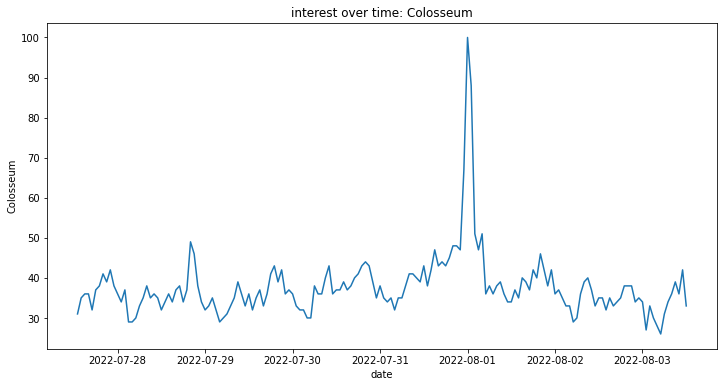

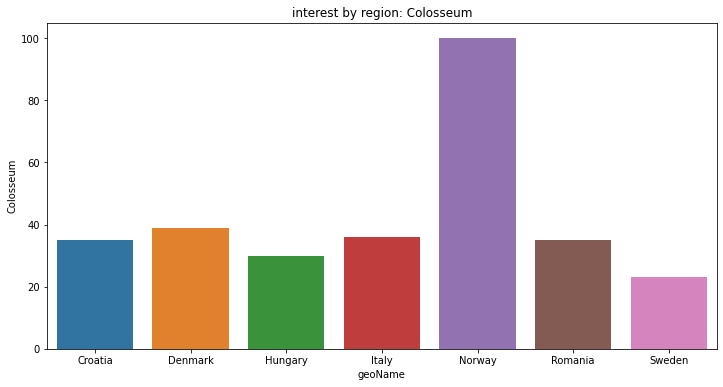

In [ ]:
suggestions(classes, pred, key1)